# FAQ Chatbot

## Importing Libraries

In [1]:
import json 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [2]:
with open('intents.json',encoding='utf-8') as file:
    data = json.load(file)
    
train_patterns = [] # patterns
train_intents = [] # tags
labels = [] #tags
responses = []


for intent in data['intents']:
    for pattern in intent['patterns']:
        train_patterns.append(pattern)
        train_intents.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
num_classes = len(labels)

In [3]:
print("train_patterns :", train_patterns[10])
print("train_intents :", train_intents[10])
print("num_classes :", num_classes)

train_patterns : Nice chatting to you, bye
train_intents : goodbye
num_classes : 18


## LabelEncoder to encode target Labels 

In [4]:
LE = LabelEncoder()
train_intents = LE.fit_transform(train_intents)

## Tokenization

In [5]:
vocab_size = 11250
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=None)
tokenizer.fit_on_texts(train_patterns)

word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_patterns)

padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

In [6]:
print("train_patterns :", train_patterns[25])
print("sequences: ", sequences[25])
print("train_patterns :", train_patterns[20])
print("sequences: ", sequences[20])

train_patterns : What is the fee structure for the MBA program?
sequences:  [3, 7, 1, 49, 50, 4, 1, 17, 10]
train_patterns : What facilities are available at the Dublin Business School?
sequences:  [3, 45, 6, 19, 46, 1, 40, 41, 42]


## Using ANN

In [7]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 16)            180000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 18)                306       
                                                                 
Total params: 180,850
Trainable params: 180,850
Non-trainable params: 0
__________________________________________________

In [8]:
epochs = 500
history = model.fit(padded_sequences, np.array(train_intents), epochs=epochs)

Epoch 1/500
2/2 [==============================] - 1s 16ms/step - loss: 2.8900 - accuracy: 0.0333
Epoch 2/500
2/2 [==============================] - 0s 16ms/step - loss: 2.8880 - accuracy: 0.1667
Epoch 3/500
2/2 [==============================] - 0s 0s/step - loss: 2.8864 - accuracy: 0.1333
Epoch 4/500
2/2 [==============================] - 0s 0s/step - loss: 2.8850 - accuracy: 0.1333
Epoch 5/500
2/2 [==============================] - 0s 16ms/step - loss: 2.8837 - accuracy: 0.1333
Epoch 6/500
2/2 [==============================] - 0s 16ms/step - loss: 2.8824 - accuracy: 0.1500
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 2.8808 - accuracy: 0.1833
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 2.8792 - accuracy: 0.1833
Epoch 9/500
2/2 [==============================] - 0s 0s/step - loss: 2.8777 - accuracy: 0.1833
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 2.8762 - accuracy: 0.1833
Epoch 11/500
2/2 [==========

2/2 [==============================] - 0s 0s/step - loss: 2.3392 - accuracy: 0.2667
Epoch 85/500
2/2 [==============================] - 0s 16ms/step - loss: 2.3250 - accuracy: 0.2667
Epoch 86/500
2/2 [==============================] - 0s 0s/step - loss: 2.3126 - accuracy: 0.2667
Epoch 87/500
2/2 [==============================] - 0s 0s/step - loss: 2.2972 - accuracy: 0.2833
Epoch 88/500
2/2 [==============================] - 0s 0s/step - loss: 2.2834 - accuracy: 0.2833
Epoch 89/500
2/2 [==============================] - 0s 8ms/step - loss: 2.2701 - accuracy: 0.2833
Epoch 90/500
2/2 [==============================] - 0s 8ms/step - loss: 2.2563 - accuracy: 0.3000
Epoch 91/500
2/2 [==============================] - 0s 8ms/step - loss: 2.2447 - accuracy: 0.3000
Epoch 92/500
2/2 [==============================] - 0s 0s/step - loss: 2.2294 - accuracy: 0.3167
Epoch 93/500
2/2 [==============================] - 0s 12ms/step - loss: 2.2166 - accuracy: 0.3167
Epoch 94/500
2/2 [==================

2/2 [==============================] - 0s 8ms/step - loss: 1.3669 - accuracy: 0.6167
Epoch 168/500
2/2 [==============================] - 0s 0s/step - loss: 1.3568 - accuracy: 0.6167
Epoch 169/500
2/2 [==============================] - 0s 0s/step - loss: 1.3472 - accuracy: 0.6167
Epoch 170/500
2/2 [==============================] - 0s 0s/step - loss: 1.3375 - accuracy: 0.6167
Epoch 171/500
2/2 [==============================] - 0s 16ms/step - loss: 1.3273 - accuracy: 0.6333
Epoch 172/500
2/2 [==============================] - 0s 0s/step - loss: 1.3168 - accuracy: 0.6333
Epoch 173/500
2/2 [==============================] - 0s 0s/step - loss: 1.3078 - accuracy: 0.6500
Epoch 174/500
2/2 [==============================] - 0s 0s/step - loss: 1.2987 - accuracy: 0.6500
Epoch 175/500
2/2 [==============================] - 0s 16ms/step - loss: 1.2881 - accuracy: 0.6500
Epoch 176/500
2/2 [==============================] - 0s 0s/step - loss: 1.2789 - accuracy: 0.6667
Epoch 177/500
2/2 [==========

2/2 [==============================] - 0s 8ms/step - loss: 0.7065 - accuracy: 0.8500
Epoch 251/500
2/2 [==============================] - 0s 0s/step - loss: 0.7017 - accuracy: 0.8500
Epoch 252/500
2/2 [==============================] - 0s 8ms/step - loss: 0.6961 - accuracy: 0.8500
Epoch 253/500
2/2 [==============================] - 0s 0s/step - loss: 0.6899 - accuracy: 0.8500
Epoch 254/500
2/2 [==============================] - 0s 8ms/step - loss: 0.6850 - accuracy: 0.8500
Epoch 255/500
2/2 [==============================] - 0s 0s/step - loss: 0.6794 - accuracy: 0.8500
Epoch 256/500
2/2 [==============================] - 0s 8ms/step - loss: 0.6749 - accuracy: 0.8500
Epoch 257/500
2/2 [==============================] - 0s 0s/step - loss: 0.6683 - accuracy: 0.8500
Epoch 258/500
2/2 [==============================] - 0s 8ms/step - loss: 0.6639 - accuracy: 0.8500
Epoch 259/500
2/2 [==============================] - 0s 0s/step - loss: 0.6587 - accuracy: 0.8500
Epoch 260/500
2/2 [==========

2/2 [==============================] - 0s 0s/step - loss: 0.3941 - accuracy: 0.9000
Epoch 334/500
2/2 [==============================] - 0s 0s/step - loss: 0.3911 - accuracy: 0.8833
Epoch 335/500
2/2 [==============================] - 0s 0s/step - loss: 0.3890 - accuracy: 0.8833
Epoch 336/500
2/2 [==============================] - 0s 17ms/step - loss: 0.3865 - accuracy: 0.8833
Epoch 337/500
2/2 [==============================] - 0s 16ms/step - loss: 0.3847 - accuracy: 0.9000
Epoch 338/500
2/2 [==============================] - 0s 11ms/step - loss: 0.3823 - accuracy: 0.8833
Epoch 339/500
2/2 [==============================] - 0s 8ms/step - loss: 0.3801 - accuracy: 0.9000
Epoch 340/500
2/2 [==============================] - 0s 9ms/step - loss: 0.3774 - accuracy: 0.9000
Epoch 341/500
2/2 [==============================] - 0s 0s/step - loss: 0.3760 - accuracy: 0.9000
Epoch 342/500
2/2 [==============================] - 0s 12ms/step - loss: 0.3730 - accuracy: 0.9000
Epoch 343/500
2/2 [=====

2/2 [==============================] - 0s 0s/step - loss: 0.2657 - accuracy: 0.9000
Epoch 417/500
2/2 [==============================] - 0s 16ms/step - loss: 0.2652 - accuracy: 0.8833
Epoch 418/500
2/2 [==============================] - 0s 0s/step - loss: 0.2640 - accuracy: 0.9000
Epoch 419/500
2/2 [==============================] - 0s 0s/step - loss: 0.2634 - accuracy: 0.9000
Epoch 420/500
2/2 [==============================] - 0s 8ms/step - loss: 0.2626 - accuracy: 0.9167
Epoch 421/500
2/2 [==============================] - 0s 0s/step - loss: 0.2610 - accuracy: 0.9167
Epoch 422/500
2/2 [==============================] - 0s 8ms/step - loss: 0.2601 - accuracy: 0.9000
Epoch 423/500
2/2 [==============================] - 0s 0s/step - loss: 0.2597 - accuracy: 0.9000
Epoch 424/500
2/2 [==============================] - 0s 8ms/step - loss: 0.2590 - accuracy: 0.9167
Epoch 425/500
2/2 [==============================] - 0s 0s/step - loss: 0.2577 - accuracy: 0.9167
Epoch 426/500
2/2 [==========

2/2 [==============================] - 0s 16ms/step - loss: 0.2107 - accuracy: 0.9167
Epoch 500/500
2/2 [==============================] - 0s 16ms/step - loss: 0.2107 - accuracy: 0.9000


In [9]:
history_dict = history.history

Text(0.5, 1.0, 'Epochs vs Loss')

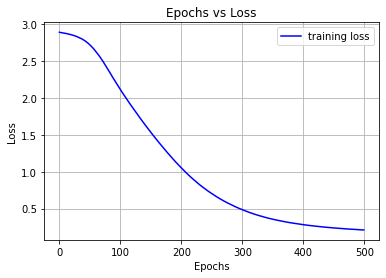

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


loss_values = history_dict['loss']
#val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'b',label='training loss')
#plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.title('Epochs vs Loss')

Text(0.5, 1.0, 'Epochs vs Accuracy')

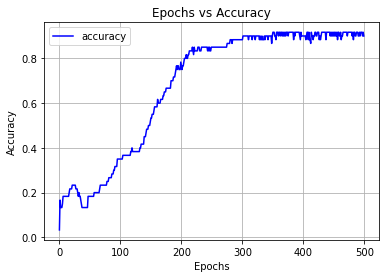

In [11]:
accuracy_values = history_dict['accuracy']
#val_accuracy_values=history_dict['val_accuracy']
#plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy')

2/2 [==============================] - 0s 0s/step


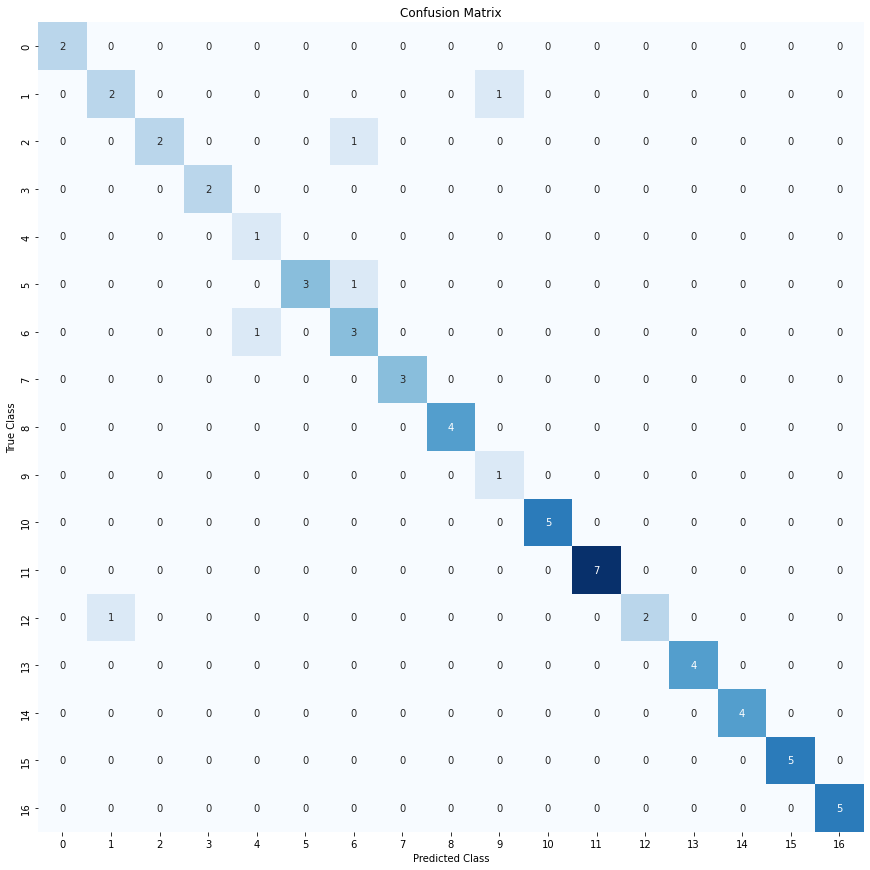

In [12]:
y_pred = model.predict(padded_sequences)
y_result=[]
for i in y_pred:
    max_value = max(i)
    #print(max_value)
    y_result.append(np.where(i == max_value)[0][0])





from sklearn.metrics import confusion_matrix
#CM matrix for training data
plt.figure(figsize=(12,12))

matrix_nn = confusion_matrix(y_result, np.array(train_intents))

sns.heatmap(matrix_nn, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

## Save the models

In [13]:
# saving model
model.save("chat_model")

import pickle

# saving tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

# saving label encoder
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(LE, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: chat_model\assets


INFO:tensorflow:Assets written to: chat_model\assets


def get_specific_response(tag):
    for intent in data['intents']:
        if intent['tag'] == tag:
            responses = intent['responses']
    response = random.choice(responses)
    return response
    
    
    
result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([message]),truncating='post', maxlen=max_len))
    
    ## Find the intent
    tag = lbl_encoder.inverse_transform([np.argmax(result)])
    print(tag)

    for i in data['intents']:
        if i['tag'] == tag: